<a href="https://colab.research.google.com/github/jaworskamalgorzata99-GIT/Maching-Learning-Bootcamp/blob/main/supervised/digit_recognition/01_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [2]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 62.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


###Import bibliotek

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import plotly.figure_factory as ff
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.3)
np.random.seed(42)

###Wczytanie danych

In [5]:
raw_digits = datasets.load_digits()
digits = raw_digits.copy()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [9]:
images = digits['images']
targets = digits['target']
print(f'images shape: {images.shape}')
print(f'targets shape: {targets.shape}')

images shape: (1797, 8, 8)
targets shape: (1797,)


In [8]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

###Wyświetlenie kilku obrazów

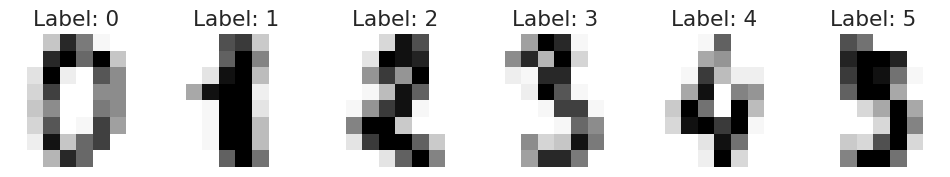

In [10]:
plt.figure(figsize=(12,10))
for index, (image, target) in enumerate(list(zip(images,targets))[:6]):
  plt.subplot(2,6, index+1)
  plt.axis('off')
  plt.imshow(image, cmap='Greys')
  plt.title(f'Label: {target}')

###Przygotowanie danych do modelu

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, targets)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

#Spłaszczenie obrazów do modelu
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print()
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (1347, 8, 8)
y_train shape: (1347,)
X_test shape: (450, 8, 8)
y_test shape: (450,)

X_train shape: (1347, 64)
X_test shape: (450, 64)


In [13]:
X_train[0]

array([ 0.,  0.,  0.,  5.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 15., 10.,
        5.,  0.,  0.,  0.,  0.,  9., 11., 10., 10.,  0.,  0.,  0.,  2.,
       15.,  2., 14.,  6.,  0.,  0.,  0.,  8., 13.,  5., 14., 13.,  4.,
        0.,  0., 11., 16., 16., 16., 14.,  3.,  0.,  0.,  0.,  0.,  3.,
       16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.])

In [14]:
y_train[0]

np.int64(4)

###Trenowanie modelu kernal='linear' - maszyna wektorów nośnych

In [64]:
from sklearn.svm import SVC

classifier = SVC(gamma=0.001, kernel='linear')
classifier.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [65]:
classifier.score(X_test, y_test)

0.9844444444444445

###Trenowanie modelu kernel='rbf' - przypomina rozkład normalny

In [18]:
classifier = SVC(gamma=0.001, kernel='rbf')
classifier.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [19]:
classifier.score(X_test, y_test)

0.9955555555555555

###Ocena modelu

In [66]:
y_pred = classifier.predict(X_test)
y_pred

array([5, 5, 6, 6, 1, 8, 6, 9, 9, 4, 1, 9, 9, 7, 7, 3, 4, 0, 0, 1, 5, 9,
       6, 7, 2, 4, 8, 3, 6, 4, 5, 1, 4, 8, 1, 6, 4, 9, 9, 6, 0, 5, 9, 7,
       9, 4, 7, 1, 2, 6, 4, 6, 3, 6, 6, 1, 1, 7, 7, 1, 2, 3, 0, 9, 1, 4,
       5, 8, 2, 7, 3, 3, 5, 1, 0, 8, 4, 9, 5, 4, 2, 9, 3, 8, 0, 5, 6, 1,
       7, 3, 3, 6, 1, 7, 6, 3, 9, 9, 7, 4, 7, 4, 7, 5, 5, 2, 3, 6, 2, 4,
       8, 5, 5, 0, 2, 9, 6, 3, 6, 2, 1, 6, 0, 1, 7, 5, 9, 4, 7, 7, 4, 0,
       3, 8, 0, 1, 5, 1, 5, 4, 8, 4, 1, 7, 0, 5, 1, 5, 3, 9, 9, 1, 7, 9,
       6, 5, 1, 6, 5, 9, 3, 2, 1, 1, 9, 0, 0, 8, 4, 2, 2, 2, 8, 7, 4, 4,
       9, 5, 1, 5, 0, 1, 2, 8, 4, 7, 6, 2, 8, 9, 4, 7, 5, 6, 2, 4, 2, 9,
       5, 6, 9, 9, 8, 5, 6, 6, 9, 5, 0, 9, 3, 9, 9, 1, 3, 8, 0, 4, 1, 1,
       2, 3, 1, 1, 5, 2, 2, 0, 8, 0, 9, 8, 8, 7, 7, 5, 4, 2, 2, 2, 6, 8,
       7, 1, 7, 3, 1, 1, 8, 6, 7, 0, 0, 1, 0, 5, 3, 0, 2, 1, 8, 0, 0, 3,
       9, 1, 4, 0, 8, 9, 6, 5, 4, 5, 3, 6, 1, 3, 2, 6, 1, 2, 6, 2, 0, 4,
       2, 6, 4, 1, 4, 5, 8, 3, 8, 6, 6, 4, 8, 4, 7,

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.94      0.98      0.96        51
           2       1.00      1.00      1.00        46
           3       1.00      0.98      0.99        47
           4       1.00      1.00      1.00        47
           5       1.00      0.98      0.99        42
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        40
           8       0.97      0.91      0.94        43
           9       0.93      1.00      0.97        43

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [68]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 43]])

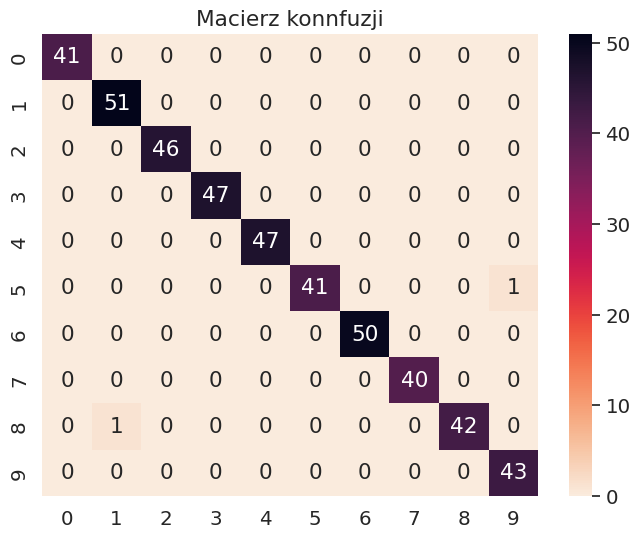

In [47]:
plt.figure(figsize=(8,6))
plt.title('Macierz konnfuzji')
_=sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [48]:
columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):
  # Multiclass classification, 3 classes
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

  fig = ff.create_annotated_heatmap(
      z=cm.values,
      x=list(cm.columns),
      y=list(cm.index),
      colorscale='ice',
      showscale=True,
      reversescale=True)

  fig.update_layout(width=700,
                    height=500,
                    title='Confusion Matrix',
                    font_size=16)
  fig.show()

plot_confusion_matrix(cm)

###Wyświetlenie błędnych predykcji

In [69]:
results = pd.DataFrame(data={'y_pred':y_pred,'y_test':y_test})
results.head(10)

,y_pred,y_test
0,5,5
1,5,5
2,6,6
3,6,6
4,1,1
5,8,8
6,6,6
7,9,9
8,9,9
9,4,4


In [70]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs

[156, 164, 200, 206, 215, 246, 328]

In [71]:
results.loc[errors_idxs, :]

,y_pred,y_test
156,1,8
164,9,8
200,9,3
206,9,5
215,8,1
246,1,8
328,1,8


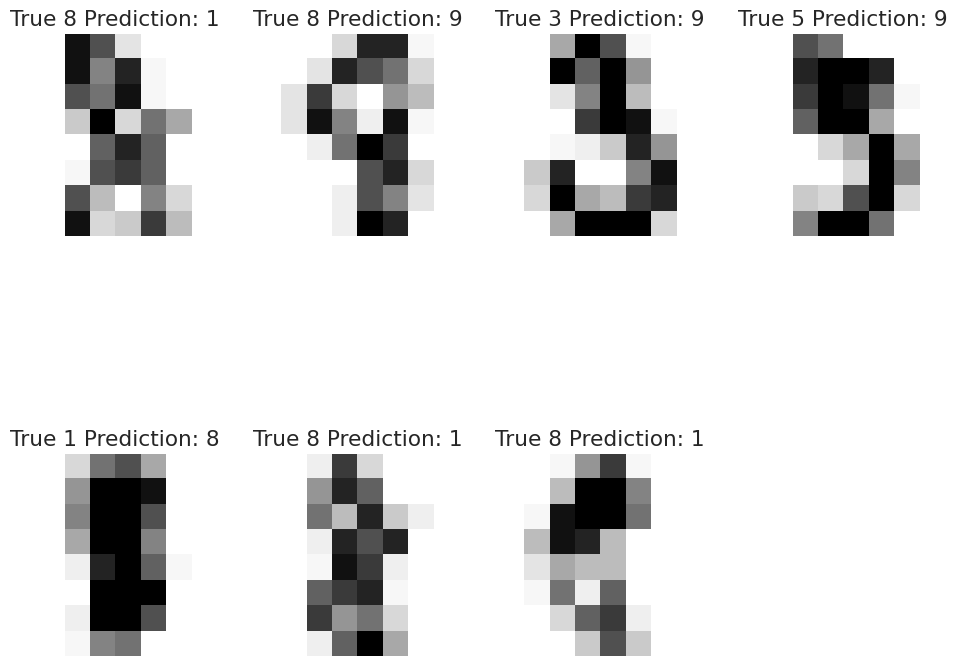

In [74]:
plt.figure(figsize=(12,10))
for idx, error_idx in enumerate(errors_idxs[:9]):
  image = X_test[error_idx].reshape(8,8)
  plt.subplot(2,4, idx+1)
  plt.axis('off')
  plt.imshow(image, cmap='Greys')
  plt.title(f"True {results.loc[error_idx, 'y_test']} Prediction: {results.loc[error_idx, 'y_pred']}")